In [1]:
# ============================================================
# Notebook setup
# ============================================================

%load_ext autoreload
%autoreload 2

# Control figure size
interactive_figures = True
if interactive_figures:
    # Normal behavior
    %matplotlib widget
    figsize=(9, 3)
else:
    # PDF export behavior
    figsize=(14, 5)

from matplotlib import pyplot as plt
import numpy as np
from util import util
import igraph as ig
    
#from util import cst
#import numpy as np
#from matplotlib import pyplot as plt
#import pandas as pd
#from tensorflow import keras
#from tensorflow.keras import layers, callbacks
#from tensorflow_probability import distributions
#from sklearn.metrics import r2_score, mean_squared_error
#from tensorflow.keras import backend as k

# Load data
#data_folder = '/app/data'
#data = cst.load_cmapss_data(data_folder)

# Identify input columns
#dt_in = list(data.columns[3:-1])

# Plan

## Plan

* Mining navigation paths
  - Count visited pages
  - Count visited links
* V1:
  - Loops allowed
  - Pricing via poly-time algo
* V2:
  - No loops
  - Pricing via CP-SAT?
* Master
  - Reconstruct available counts
  - V1: unconstrained
  - V2: minimum cover for all nodes

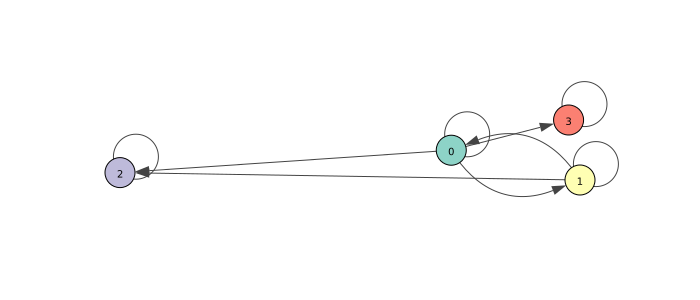

In [2]:
from util import util
import igraph as ig
g = util.build_website_graph(nnodes=4, rate=3, extra_arc_fraction=0.25, seed=42)
root = g.vs[0]

#util.display_graph(g)
ig.plot(g, **util.get_visual_style(g), bbox=(700, 300), margin=120)

In [3]:
util.route_random_flow(root, min_units=1, max_units=10, eoh=10, max_len=7)

(7.497988950401423, [(4, 0), (5, 1)])

In [4]:
eoh = 4
flows, paths = util.build_random_paths(g, min_paths=3, max_paths=5,
                                                           min_units=1, max_units=10, eoh=eoh,
                                                           seed=10)
util.print_ground_truth(flows, paths, sort='descending')

9.58: 3,0
5.45: 0,1 > 1,1 > 2,0 > 3,1
2.52: 1,0 > 2,0 > 3,2
1.23: 0,1 > 1,2 > 2,2 > 3,2


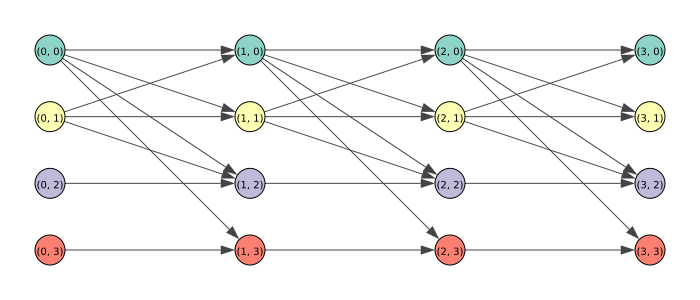

In [5]:
tug = util.build_time_unfolded_graph(g, eoh=eoh)
ig.plot(tug, **util.get_visual_style(tug), bbox=(700, 300), margin=50)

In [6]:
node_counts, arc_counts = util.get_counts(tug, flows, paths)
node_counts

{(0, 0): 0,
 (0, 1): 6.677854921559987,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 2.521997529062819,
 (1, 1): 5.451309365800277,
 (1, 2): 1.2265455557597105,
 (1, 3): 0,
 (2, 0): 7.9733068948630965,
 (2, 1): 0,
 (2, 2): 1.2265455557597105,
 (2, 3): 0,
 (3, 0): 9.58054011575443,
 (3, 1): 5.451309365800277,
 (3, 2): 3.7485430848225296,
 (3, 3): 0}

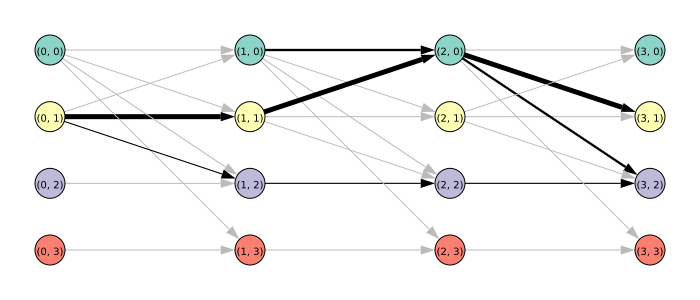

In [7]:
tugc = util.apply_weights(tug, node_counts, arc_counts)
ig.plot(tugc, **util.get_visual_style(tugc), bbox=(700, 300), margin=50)

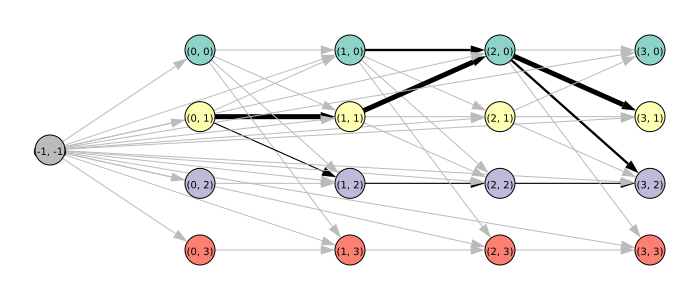

In [8]:
tugcs, tugcs_source = util._add_source_to_tug(tugc)
ig.plot(tugcs, **util.get_visual_style(tugcs), bbox=(700, 300), margin=50)

In [9]:
tug_paths = util.enumerate_paths(tugcs, tugcs_source, exclude_source=True)

for i, p in enumerate(tug_paths):
    print(f'{i}: {p}')

0: [0]
1: [0, 4]
2: [0, 4, 8]
3: [0, 4, 8, 12]
4: [0, 4, 8, 13]
5: [0, 4, 8, 14]
6: [0, 4, 8, 15]
7: [0, 4, 9]
8: [0, 4, 9, 12]
9: [0, 4, 9, 13]
10: [0, 4, 9, 14]
11: [0, 4, 10]
12: [0, 4, 10, 14]
13: [0, 4, 11]
14: [0, 4, 11, 15]
15: [0, 5]
16: [0, 5, 8]
17: [0, 5, 8, 12]
18: [0, 5, 8, 13]
19: [0, 5, 8, 14]
20: [0, 5, 8, 15]
21: [0, 5, 9]
22: [0, 5, 9, 12]
23: [0, 5, 9, 13]
24: [0, 5, 9, 14]
25: [0, 5, 10]
26: [0, 5, 10, 14]
27: [0, 6]
28: [0, 6, 10]
29: [0, 6, 10, 14]
30: [0, 7]
31: [0, 7, 11]
32: [0, 7, 11, 15]
33: [1]
34: [1, 4]
35: [1, 4, 8]
36: [1, 4, 8, 12]
37: [1, 4, 8, 13]
38: [1, 4, 8, 14]
39: [1, 4, 8, 15]
40: [1, 4, 9]
41: [1, 4, 9, 12]
42: [1, 4, 9, 13]
43: [1, 4, 9, 14]
44: [1, 4, 10]
45: [1, 4, 10, 14]
46: [1, 4, 11]
47: [1, 4, 11, 15]
48: [1, 5]
49: [1, 5, 8]
50: [1, 5, 8, 12]
51: [1, 5, 8, 13]
52: [1, 5, 8, 14]
53: [1, 5, 8, 15]
54: [1, 5, 9]
55: [1, 5, 9, 12]
56: [1, 5, 9, 13]
57: [1, 5, 9, 14]
58: [1, 5, 10]
59: [1, 5, 10, 14]
60: [1, 6]
61: [1, 6, 10]
62: [1, 6, 10,

In [10]:
tmp = util.tug_paths_to_original(tugcs, tug_paths)
for i, p in enumerate(tmp):
    print(f'{i}: {p}')

0: [(0, 0)]
1: [(0, 0), (1, 0)]
2: [(0, 0), (1, 0), (2, 0)]
3: [(0, 0), (1, 0), (2, 0), (3, 0)]
4: [(0, 0), (1, 0), (2, 0), (3, 1)]
5: [(0, 0), (1, 0), (2, 0), (3, 2)]
6: [(0, 0), (1, 0), (2, 0), (3, 3)]
7: [(0, 0), (1, 0), (2, 1)]
8: [(0, 0), (1, 0), (2, 1), (3, 0)]
9: [(0, 0), (1, 0), (2, 1), (3, 1)]
10: [(0, 0), (1, 0), (2, 1), (3, 2)]
11: [(0, 0), (1, 0), (2, 2)]
12: [(0, 0), (1, 0), (2, 2), (3, 2)]
13: [(0, 0), (1, 0), (2, 3)]
14: [(0, 0), (1, 0), (2, 3), (3, 3)]
15: [(0, 0), (1, 1)]
16: [(0, 0), (1, 1), (2, 0)]
17: [(0, 0), (1, 1), (2, 0), (3, 0)]
18: [(0, 0), (1, 1), (2, 0), (3, 1)]
19: [(0, 0), (1, 1), (2, 0), (3, 2)]
20: [(0, 0), (1, 1), (2, 0), (3, 3)]
21: [(0, 0), (1, 1), (2, 1)]
22: [(0, 0), (1, 1), (2, 1), (3, 0)]
23: [(0, 0), (1, 1), (2, 1), (3, 1)]
24: [(0, 0), (1, 1), (2, 1), (3, 2)]
25: [(0, 0), (1, 1), (2, 2)]
26: [(0, 0), (1, 1), (2, 2), (3, 2)]
27: [(0, 0), (1, 2)]
28: [(0, 0), (1, 2), (2, 2)]
29: [(0, 0), (1, 2), (2, 2), (3, 2)]
30: [(0, 0), (1, 3)]
31: [(0, 0), (1

In [11]:
paths

[[(0, 1), (1, 1), (2, 0), (3, 1)],
 [(0, 1), (1, 2), (2, 2), (3, 2)],
 [(1, 0), (2, 0), (3, 2)],
 [(3, 0)]]

In [12]:
#pidx = [0, 26, 32, 30, 16]
#tug_paths = [tug_paths[i] for i in pidx]
#tug_paths

$$
\arg \min_{x} \left\{\|Vx - \hat{v}\|_2^2 + \|Ex - \hat{e}\|_2^2 \mid x \geq 0 \right\}
$$

$$\begin{align}
\|Ax - b\|_2^2 &= (Ax - b)^T (Ax - b) \\
&= x^T A^TA x - x^T A^T b - b^T Ax + b^T b \\
&\propto \frac{1}{2} x^T (A^TA) x - \frac{1}{2} x^T A^T b - \frac{1}{2} b^T Ax \\
&= \frac{1}{2} x^T (A^TA) x + (-A^Tb)^Tx
\end{align}$$

Since $y^Tx = x^Ty$ if the result is a scalar

$$
\|Vx - \hat{v}\|_2^2 + \|Ex - \hat{e}\|_2^2 \\
\propto \frac{1}{2} \|Vx - \hat{v}\|_2^2 + \frac{1}{2} \|Ex - \hat{e}\|_2^2 \\
= \frac{1}{2}x^T (V^T V) x + (-V^T \hat{v})^T x + \frac{1}{2} x^T (E^T E) x + (-E^T \hat{e})^T x \\
= \frac{1}{2} x^T P x + q^T x
$$
where:
$$
P = V^T V + E^T E \\
q = -V^T \hat{v} -E^T \hat{e}
$$
and $P$ is guaranteed to be positive semi-definite

In [13]:
V, E = util._paths_to_coefficient_matrices(tug, tug_paths)
v, e = util._counts_to_target_vectors(tug, node_counts, arc_counts)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [14]:
node_counts

{(0, 0): 0,
 (0, 1): 6.677854921559987,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 2.521997529062819,
 (1, 1): 5.451309365800277,
 (1, 2): 1.2265455557597105,
 (1, 3): 0,
 (2, 0): 7.9733068948630965,
 (2, 1): 0,
 (2, 2): 1.2265455557597105,
 (2, 3): 0,
 (3, 0): 9.58054011575443,
 (3, 1): 5.451309365800277,
 (3, 2): 3.7485430848225296,
 (3, 3): 0}

In [15]:
v.reshape((-1,1))

array([[0.        ],
       [6.67785492],
       [0.        ],
       [0.        ],
       [2.52199753],
       [5.45130937],
       [1.22654556],
       [0.        ],
       [7.97330689],
       [0.        ],
       [1.22654556],
       [0.        ],
       [9.58054012],
       [5.45130937],
       [3.74854308],
       [0.        ]])

In [16]:
arc_counts

{(1, 0, 0): 0,
 (1, 0, 1): 0,
 (1, 1, 1): 5.451309365800277,
 (1, 0, 2): 0,
 (1, 2, 2): 0,
 (1, 0, 3): 0,
 (1, 3, 3): 0,
 (1, 1, 0): 0,
 (1, 1, 2): 1.2265455557597105,
 (2, 0, 0): 2.521997529062819,
 (2, 0, 1): 0,
 (2, 1, 1): 0,
 (2, 0, 2): 0,
 (2, 2, 2): 1.2265455557597105,
 (2, 0, 3): 0,
 (2, 3, 3): 0,
 (2, 1, 0): 5.451309365800277,
 (2, 1, 2): 0,
 (3, 0, 0): 0,
 (3, 0, 1): 5.451309365800277,
 (3, 1, 1): 0,
 (3, 0, 2): 2.521997529062819,
 (3, 2, 2): 1.2265455557597105,
 (3, 0, 3): 0,
 (3, 3, 3): 0,
 (3, 1, 0): 0,
 (3, 1, 2): 0}

In [17]:
e.reshape((-1,1))

array([[0.        ],
       [0.        ],
       [5.45130937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.22654556],
       [2.52199753],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.22654556],
       [0.        ],
       [0.        ],
       [5.45130937],
       [0.        ],
       [0.        ],
       [5.45130937],
       [0.        ],
       [2.52199753],
       [1.22654556],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
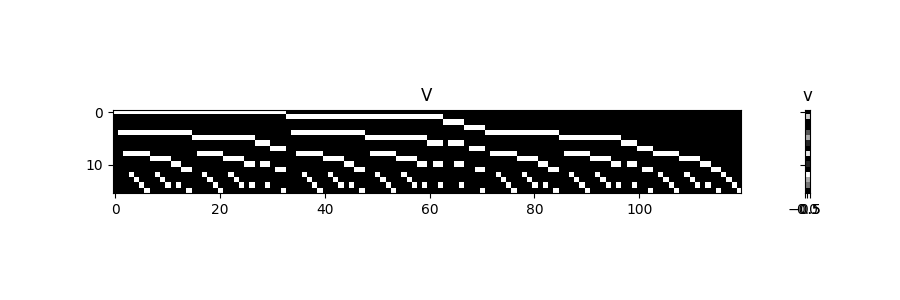

In [18]:
plt.close('all')
util.plot_matrix(V.toarray(), v, figsize=figsize, title='V', title_b='v')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
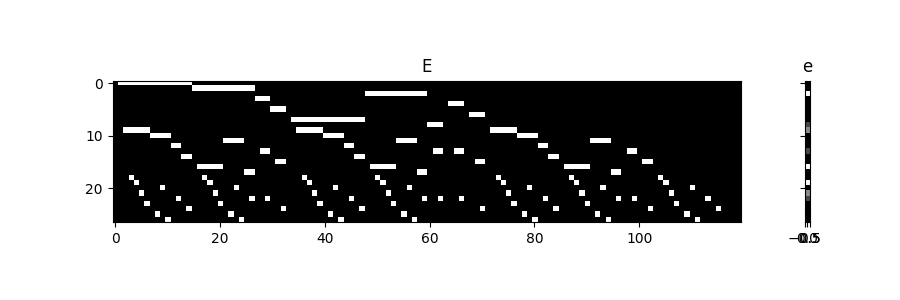

In [19]:
plt.close('all')
util.plot_matrix(E.toarray(), e, figsize=figsize, title='E', title_b='e')

In [20]:
#prb = util.PathSelectionSolver(tug, node_counts, arc_counts)
#sol = prb.solve(tug_paths)
#reconstructed_paths = prb.sol_to_paths()
#reconstructed_paths

rflows, rpaths = util.solve_path_selection_full(tug, node_counts, arc_counts, verbose=1)
util.print_solution(tug, rflows, rpaths, sort='descending')
print('FLOW: PATH')
sse = util.get_reconstruction_error(tug, rflows, rpaths, node_counts, arc_counts)
print(f'SSE: {sse:.2f}')

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 120, constraints m = 120
          nnz(P) + nnz(A) = 3520
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.5048e+02   4.34e-01   1.81e+01   1.00e-01   9.19e-04s
  50  -1.9458e+02   7.04e-04   4.24e-02   1.00e-01   2.89e-03s
plsh  -1.9460e+02   1.82e-16   2.95e-14   ---

In [21]:
util.print_ground_truth(flows, paths, sort='descending')

9.58: 3,0
5.45: 0,1 > 1,1 > 2,0 > 3,1
2.52: 1,0 > 2,0 > 3,2
1.23: 0,1 > 1,2 > 2,2 > 3,2


In [22]:
sse = util.get_reconstruction_error(tug, rflows, rpaths, node_counts, arc_counts)
sse

4.633141812848573e-25

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
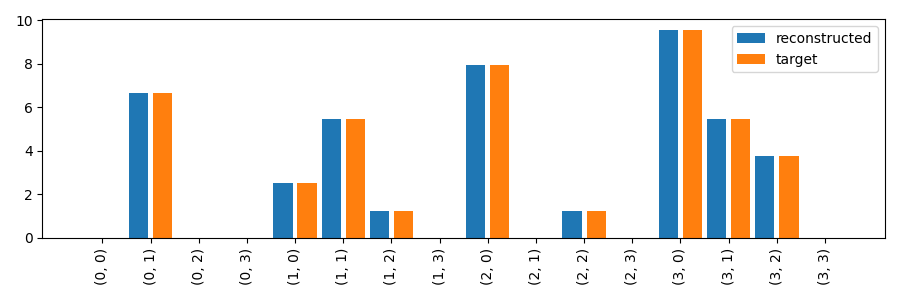

In [23]:
rec_node_counts, rec_arc_counts = util.get_counts(tug, rflows, rpaths)
util.plot_dict(rec_node_counts, figsize=figsize, label='reconstructed', data2=node_counts, label2='target',
              title='Node Counts')

In [24]:
cflows, cpaths, _ = util.consolidate_paths(tug, rflows, rpaths, node_counts, arc_counts)
util.print_solution(tug, cflows, cpaths, sort='descending')

9.58: 3,0
5.45: 0,1 > 1,1 > 2,0 > 3,1
2.52: 1,0 > 2,0 > 3,2
1.23: 0,1 > 1,2 > 2,2 > 3,2


In [25]:
util.print_ground_truth(flows, paths, sort='descending')

9.58: 3,0
5.45: 0,1 > 1,1 > 2,0 > 3,1
2.52: 1,0 > 2,0 > 3,2
1.23: 0,1 > 1,2 > 2,2 > 3,2


In [26]:
node_res, arc_res = util._get_residuals(tug, cflows, cpaths, node_counts, arc_counts)
node_res

{(0, 0): 0,
 (0, 1): 0.0,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): -6.661338147750939e-16,
 (1, 3): 0,
 (2, 0): 0.0,
 (2, 1): 0,
 (2, 2): -6.661338147750939e-16,
 (2, 3): 0,
 (3, 0): 0.0,
 (3, 1): 0.0,
 (3, 2): -4.440892098500626e-16,
 (3, 3): 0}

In [27]:
# Obtain dual multipliers assuming a standard form
#master.get_standard_duals()

$$
\mathcal{L}(x, \lambda) = \frac{1}{2} x^T P x + q^T x + \lambda^T (-x) \\
\nabla_x \mathcal{L}(x, \lambda) = \frac{1}{2} x^T(P + P^T) + q - \lambda^T
$$

$$
\frac{1}{2} \|Vx - \hat{v}\|_2^2 = \frac{1}{2} \sum_{i = 1}^m \left(\sum_{j=1}^n V_{ij} x_{j} - \hat{v}_i\right)^2
$$
$$
\frac{\partial}{\partial x_j} \frac{1}{2} \|Vx - \hat{v}\|_2^2 = \sum_{i=1}^m \left(\sum_{j=1}^n V_{ij} x_{j} - \hat{v}_i\right) V_{ij}
$$


In [28]:
tug_path_selection_0 = tug_paths[1:3]

rflows0, rpaths0 = util.solve_path_selection_full(tug, node_counts, arc_counts,
                                             initial_paths=tug_path_selection_0, verbose=1)

#master = util.PathSelectionSolver(tug, node_counts, arc_counts)
#sol = master.solve(tug_path_selection_0)
#raw_paths_0 = master.sol_to_paths()
#raw_paths_0
util.print_solution(tug, rflows0, rpaths0, sort='descending')

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 2, constraints m = 2
          nnz(P) + nnz(A) = 5
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.3634e+01   1.54e+00   1.51e+00   1.00e-01   7.02e-05s
  25  -1.6945e+01   2.39e-06   7.17e-06   1.00e-01   2.80e-04s
plsh  -1.6945e+01   5.90e-23   6.36e-16   --------  

In [29]:
nres, ares = util._get_residuals(tug, rflows0, rpaths0, node_counts, arc_counts)
nres

{(0, 0): 2.6034603905977467,
 (0, 1): -6.677854921559987,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 0.08146286153492754,
 (1, 1): -5.451309365800277,
 (1, 2): -1.2265455557597105,
 (1, 3): 0,
 (2, 0): -5.36984650426535,
 (2, 1): 0,
 (2, 2): -1.2265455557597105,
 (2, 3): 0,
 (3, 0): -9.58054011575443,
 (3, 1): -5.451309365800277,
 (3, 2): -3.7485430848225296,
 (3, 3): 0}

In [30]:
ares

{(1, 0, 0): 2.6034603905977467,
 (1, 0, 1): 0,
 (1, 1, 1): -5.451309365800277,
 (1, 0, 2): 0,
 (1, 2, 2): 0,
 (1, 0, 3): 0,
 (1, 3, 3): 0,
 (1, 1, 0): 0,
 (1, 1, 2): -1.2265455557597105,
 (2, 0, 0): 0.08146286153492754,
 (2, 0, 1): 0,
 (2, 1, 1): 0,
 (2, 0, 2): 0,
 (2, 2, 2): -1.2265455557597105,
 (2, 0, 3): 0,
 (2, 3, 3): 0,
 (2, 1, 0): -5.451309365800277,
 (2, 1, 2): 0,
 (3, 0, 0): 0,
 (3, 0, 1): -5.451309365800277,
 (3, 1, 1): 0,
 (3, 0, 2): -2.521997529062819,
 (3, 2, 2): -1.2265455557597105,
 (3, 0, 3): 0,
 (3, 3, 3): 0,
 (3, 1, 0): 0,
 (3, 1, 2): 0}

In [31]:
ncosts, npaths = util.solve_pricing_problem(tug, rflows0, rpaths0,
                                             node_counts, arc_counts, filter_paths=False)
print('COST: PATH')
util.print_solution(tug, ncosts, npaths, sort=None)

COST: PATH
-39.30: 0,1 > 1,1 > 2,0 > 3,1
-37.98: 0,1 > 1,1 > 2,0 > 3,0
-34.67: 0,1 > 1,1 > 2,0 > 3,2
-28.40: 0,1 > 1,1 > 2,0
-28.40: 0,1 > 1,1 > 2,0 > 3,3
-18.81: 0,1 > 1,1 > 2,2
-17.58: 0,1 > 1,1
-17.58: 0,1 > 1,1 > 2,1
-9.13: 0,1 > 1,2
-6.68: 0,1
-6.60: 0,1 > 1,0
-6.60: 0,1 > 1,0 > 2,3
0.00: 0,2
0.00: 0,3
0.00: 1,3
2.60: 0,0


In [32]:
neg_paths = [p for p, c in zip(npaths, ncosts) if c < 0]
tug_path_selection_1 = tug_path_selection_0 + neg_paths

rflows1, rpaths1 = util.solve_path_selection_full(tug, node_counts, arc_counts,
                                             initial_paths=tug_path_selection_1, verbose=1)

util.print_solution(tug, rflows1, rpaths1, sort='descending')


-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 14, constraints m = 14
          nnz(P) + nnz(A) = 104
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.2917e+02   6.84e-03   1.47e+01   1.00e-01   7.39e-05s
  25  -1.4816e+02   2.72e-05   5.81e-05   1.00e-01   5.34e-04s
plsh  -1.4816e+02   2.09e-16   1.20e-14   ------

In [33]:
neg_paths = [p for p, c in zip(npaths, ncosts) if c >= 0]
tug_path_selection_1 = tug_path_selection_0 + neg_paths

rflows1, rpaths1 = util.solve_path_selection_full(tug, node_counts, arc_counts,
                                             initial_paths=tug_path_selection_1, verbose=1)

util.print_solution(tug, rflows1, rpaths1, sort='descending')


-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 6, constraints m = 6
          nnz(P) + nnz(A) = 15
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -2.4860e+01   1.31e+00   1.51e+00   1.00e-01   5.86e-05s
  25  -1.6945e+01   3.58e-06   7.17e-06   1.00e-01   6.68e-04s
plsh  -1.6945e+01   1.01e-22   6.36e-16   -------- 

In [34]:
rflows_cg, rpaths_cg = util.trajectory_extraction_cg(tug, node_counts, arc_counts, max_iter=30, verbose=1)
print('FLOW: PATH')
util.print_solution(tug, rflows_cg, rpaths_cg, sort='descending')

It.0, sse: 106.38, #paths: 25, new: 9
It.1, sse: 12.15, #paths: 31, new: 6
It.2, sse: 1.50, #paths: 32, new: 1
It.3, sse: 1.06, #paths: 37, new: 5
It.4, sse: 0.00, #paths: 37, new: 0
FLOW: PATH
9.58: 3,0
3.40: 0,1 > 1,1 > 2,0 > 3,1
2.05: 1,0 > 2,0 > 3,1
2.05: 0,1 > 1,1 > 2,0 > 3,2
1.23: 0,1 > 1,2 > 2,2 > 3,2
0.47: 1,0 > 2,0 > 3,2


/usr/local/lib/python3.6/dist-packages/osqp/utils.py:119: UserWarning: Converting sparse P to a CSC (compressed sparse column) matrix. (It may take a while...)
  "(compressed sparse column) matrix. (It may take a while...)")


In [35]:
cflows_cg, cpaths_cg, copt = util.consolidate_paths(tug, rflows_cg, rpaths_cg, node_counts, arc_counts)
print('FLOW: PATH')
util.print_solution(tug, cflows_cg, cpaths_cg, sort='descending')

FLOW: PATH
9.58: 3,0
5.45: 0,1 > 1,1 > 2,0 > 3,1
2.52: 1,0 > 2,0 > 3,2
1.23: 0,1 > 1,2 > 2,2 > 3,2


In [36]:
print('FLOW: PATH')
util.print_ground_truth(flows, paths, sort='descending')

FLOW: PATH
9.58: 3,0
5.45: 0,1 > 1,1 > 2,0 > 3,1
2.52: 1,0 > 2,0 > 3,2
1.23: 0,1 > 1,2 > 2,2 > 3,2


# Scalability

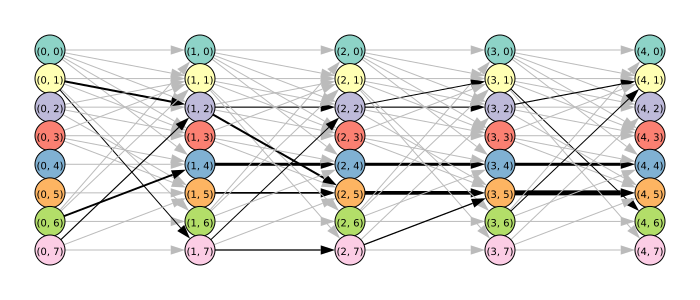

In [43]:
nnodes2 = 8
eoh2 = 5
g2 = util.build_website_graph(nnodes=nnodes2, rate=3, extra_arc_fraction=0.25, seed=42)
flows2, paths2 = util.build_random_paths(g2, min_paths=nnodes2*eoh2/10, max_paths=3*nnodes2*eoh2/10,
                                       min_units=1, max_units=10, eoh=eoh2, seed=10)
tug2 = util.build_time_unfolded_graph(g2, eoh=eoh2)
node_counts2, arc_counts2 = util.get_counts(tug2, flows2, paths2)

#ig.plot(g2, **util.get_visual_style(g2), bbox=(700, 300), margin=120)

tugc2 = util.apply_weights(tug2, node_counts2, arc_counts2)
ig.plot(tugc2, **util.get_visual_style(tugc2), bbox=(700, 300), margin=50)

In [44]:
%%time
rflows2, rpaths2 = util.solve_path_selection_full(tug2, node_counts2, arc_counts2, verbose=1)
print('FLOW: PATH')
util.print_solution(tug2, rflows2, rpaths2, sort='descending')
sse = util.get_reconstruction_error(tug2, rflows2, rpaths2, node_counts2, arc_counts2)
print(f'SSE: {sse:.2f}')

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 1949, constraints m = 1949
          nnz(P) + nnz(A) = 871842
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -1.7598e+03   2.35e-01   6.12e+01   1.00e-01   2.61e+00s
 200  -2.2335e+03   1.05e-04   1.24e-01   1.00e-01   3.98e+00s
plsh  -2.2337e+03   7.88e-16   1.68e-11  

In [45]:
%%time
rflows_cg2, rpaths_cg2 = util.trajectory_extraction_cg(tug2, node_counts2, arc_counts2,
                                                       max_iter=30, verbose=1, max_paths_per_iter=10)
print('FLOW: PATH')
util.print_solution(tug2, rflows_cg2, rpaths_cg2, sort='descending')
sse = util.get_reconstruction_error(tug2, rflows_cg2, rpaths_cg2, node_counts2, arc_counts2)
print(f'SSE: {sse:.2f}')

It.0, sse: 1764.26, #paths: 50, new: 10
It.1, sse: 400.80, #paths: 60, new: 10
It.2, sse: 151.21, #paths: 70, new: 10
It.3, sse: 10.85, #paths: 80, new: 10
It.4, sse: 7.82, #paths: 90, new: 10
It.5, sse: 3.56, #paths: 99, new: 9
It.6, sse: 0.00, #paths: 99, new: 0
FLOW: PATH
8.90: 0,1 > 1,2 > 2,5 > 3,5 > 4,5
8.31: 0,6 > 1,4 > 2,4 > 3,4 > 4,4
7.38: 1,5 > 2,5 > 3,5 > 4,5
4.91: 1,4 > 2,4 > 3,4 > 4,4
3.37: 0,1 > 1,7 > 2,7 > 3,5 > 4,5
2.87: 0,7 > 1,2 > 2,2 > 3,2 > 4,1
2.28: 3,6 > 4,1
2.25: 1,7 > 2,7 > 3,5 > 4,5
2.12: 1,7 > 2,2 > 3,2 > 4,1
2.12: 0,7 > 1,2 > 2,2 > 3,1 > 4,6
1.26: 1,7 > 2,2 > 3,1 > 4,6
SSE: 0.00
CPU times: user 453 ms, sys: 3.29 ms, total: 456 ms
Wall time: 454 ms


# Scale up even more

In [46]:
nnodes3 = 20
eoh3 = 7
g3 = util.build_website_graph(nnodes=nnodes3, rate=3, extra_arc_fraction=0.25, seed=42)
flows3, paths3 = util.build_random_paths(g3, min_paths=nnodes3*eoh3/10, max_paths=3*nnodes3*eoh3/10,
                                       min_units=1, max_units=10, eoh=eoh3, seed=10)
tug3 = util.build_time_unfolded_graph(g3, eoh=eoh3)
node_counts3, arc_counts3 = util.get_counts(tug3, flows3, paths3)

In [47]:
%%time
rflows_cg3, rpaths_cg3 = util.trajectory_extraction_cg(tug3, node_counts3, arc_counts3,
                                                       max_iter=30, verbose=1, max_paths_per_iter=10)
print('FLOW: PATH')
util.print_solution(tug3, rflows_cg3, rpaths_cg3, sort='descending')
sse = util.get_reconstruction_error(tug3, rflows_cg3, rpaths_cg3, node_counts3, arc_counts3)
print(f'SSE: {sse:.2f}')

It.0, sse: 3100.12, #paths: 150, new: 10
It.1, sse: 1862.54, #paths: 160, new: 10
It.2, sse: 1403.52, #paths: 170, new: 10
It.3, sse: 769.03, #paths: 180, new: 10
It.4, sse: 568.71, #paths: 190, new: 10
It.5, sse: 453.73, #paths: 200, new: 10
It.6, sse: 357.63, #paths: 210, new: 10
It.7, sse: 114.91, #paths: 220, new: 10
It.8, sse: 100.24, #paths: 230, new: 10
It.9, sse: 79.34, #paths: 240, new: 10
It.10, sse: 73.31, #paths: 250, new: 10
It.11, sse: 68.68, #paths: 260, new: 10
It.12, sse: 66.80, #paths: 270, new: 10
It.13, sse: 40.96, #paths: 280, new: 10
It.14, sse: 37.74, #paths: 290, new: 10
It.15, sse: 33.17, #paths: 300, new: 10
It.16, sse: 5.53, #paths: 310, new: 10
It.17, sse: 5.34, #paths: 320, new: 10
It.18, sse: 5.13, #paths: 330, new: 10
It.19, sse: 2.71, #paths: 340, new: 10
It.20, sse: 0.37, #paths: 350, new: 10
It.21, sse: 0.42, #paths: 360, new: 10
It.22, sse: 0.53, #paths: 370, new: 10
It.23, sse: 0.00, #paths: 370, new: 0
FLOW: PATH
9.89: 6,0
8.88: 0,13 > 1,16 > 2,7 > 

# Noise and Minimum cover constraint

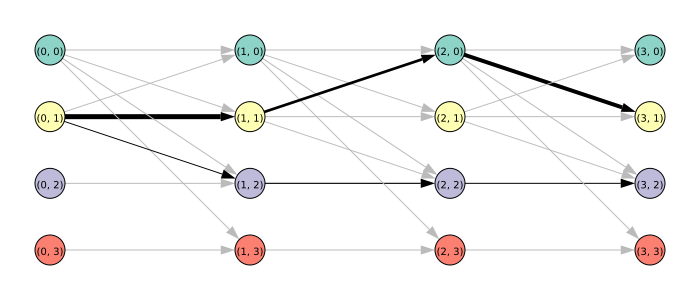

In [2]:
nnodes4 = 4
eoh4 = 4
g4 = util.build_website_graph(nnodes=nnodes4, rate=3, extra_arc_fraction=0.25, seed=42)
flows4, paths4 = util.build_random_paths(g4, min_paths=nnodes4*eoh4/10, max_paths=5*nnodes4*eoh4/10,
                                       min_units=1, max_units=10, eoh=eoh4, seed=10)
tug4 = util.build_time_unfolded_graph(g4, eoh=eoh4)
node_counts4, arc_counts4 = util.get_counts(tug4, flows4, paths4)
node_counts4, arc_counts4 = util.add_proportional_noise(node_counts4, arc_counts4, sigma=0.3)

tugc4 = util.apply_weights(tug4, node_counts4, arc_counts4)
ig.plot(tugc4, **util.get_visual_style(tugc4), bbox=(700, 300), margin=50)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
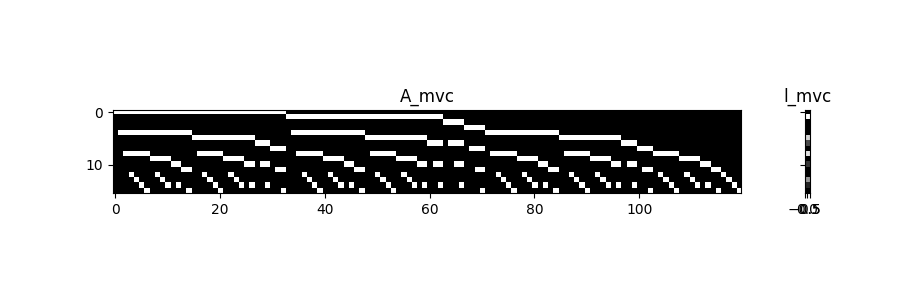

In [3]:
tugs4, tugs_source4 = util._add_source_to_tug(tug4)
tug_paths4 = util.enumerate_paths(tugs4, tugs_source4, exclude_source=True)
A_mvc, l_mvc, u_mvc = util._min_vertex_cover_constraints(tug4, tug_paths4,
                                                         node_counts4, min_vertex_cover=0.8)
util.plot_matrix(A_mvc.toarray(), l_mvc, figsize=figsize, title='A_mvc', title_b='l_mvc')

In [4]:
min_vertex_cover=0.8
alpha=10
rflows4, rpaths4, nneg_duals4, ncov_duals4 = util.solve_path_selection_full(tug4, node_counts4, arc_counts4,
                                                  min_vertex_cover=min_vertex_cover, alpha=alpha,
                                                  verbose=1, return_duals=True)
print('FLOW: PATH')
util.print_solution(tug4, rflows4, rpaths4, sort='descending')
sse = util.get_reconstruction_error(tug4, rflows4, rpaths4, node_counts4, arc_counts4)
print(f'SSE: {sse:.2f}')

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 120, constraints m = 136
          nnz(P) + nnz(A) = 3860
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -7.9910e+02   6.72e+00   2.92e+01   1.00e-01   9.84e-04s
  50  -7.8243e+01   2.62e-03   3.16e-02   1.00e-01   2.69e-03s

status:               solved
solution polish

/usr/local/lib/python3.6/dist-packages/osqp/utils.py:123: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  "(compressed sparse column) matrix. (It may take a while...)")


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
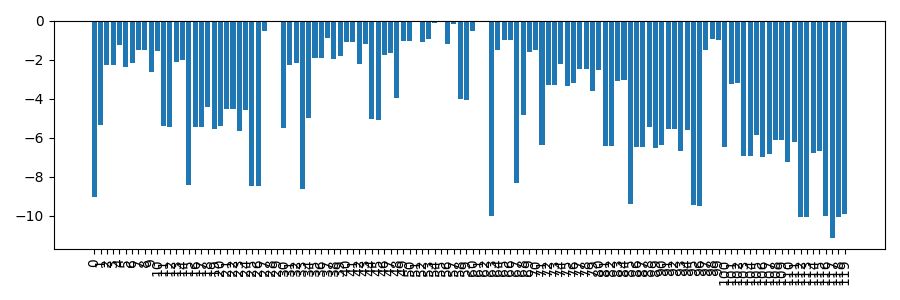

In [5]:
util.plot_dict({i:v for i, v in enumerate(nneg_duals4)}, figsize=figsize)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
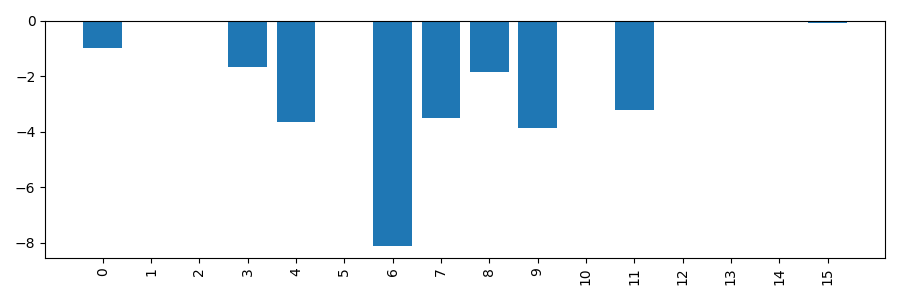

In [6]:
util.plot_dict({i:v for i, v in enumerate(ncov_duals4)}, figsize=figsize)

In [30]:
ncosts4, npaths4 = util.solve_pricing_problem(tug4, rflows4, rpaths4,
                                             node_counts4, arc_counts4,
                                             cover_duals=ncov_duals4, alpha=alpha, filter_paths=True)
print('COST: PATH')
util.print_solution(tug4, ncosts4, npaths4, sort=None)

COST: PATH
-0.04: 0,1 > 1,2 > 2,2
-0.02: 0,1 > 1,2 > 2,2 > 3,2
-0.01: 0,1 > 1,1 > 2,0 > 3,1


In [8]:
%%time
rflows_cg4, rpaths_cg4 = util.trajectory_extraction_cg(tug4, node_counts4, arc_counts4,
                                                       alpha=alpha, min_vertex_cover=min_vertex_cover,
                                                       max_iter=30, verbose=1, max_paths_per_iter=10)
print('FLOW: PATH')
util.print_solution(tug4, rflows_cg4, rpaths_cg4, sort='descending')
sse = util.get_reconstruction_error(tug4, rflows_cg4, rpaths_cg4, node_counts4, arc_counts4)
print(f'SSE: {sse:.2f}')

/usr/local/lib/python3.6/dist-packages/osqp/utils.py:119: UserWarning: Converting sparse P to a CSC (compressed sparse column) matrix. (It may take a while...)
  "(compressed sparse column) matrix. (It may take a while...)")


It.0, sse: 167.39, #paths: 26, new: 10
It.1, sse: 26.86, #paths: 35, new: 9
It.2, sse: 26.39, #paths: 42, new: 7
It.3, sse: 25.45, #paths: 45, new: 3
It.4, sse: 26.52, #paths: 45, new: 0
FLOW: PATH
2.49: 0,1 > 1,1 > 2,0 > 3,1
2.49: 0,1 > 1,1 > 2,0 > 3,1
1.05: 0,1 > 1,2 > 2,2 > 3,2
0.37: 0,1 > 1,2 > 2,2
SSE: 26.52
CPU times: user 228 ms, sys: 4.09 ms, total: 232 ms
Wall time: 229 ms


# NP-hard Pricing Problem

In [62]:
ncosts4, npaths4 = util.solve_pricing_problem_maxwaits(tug4, rflows4, rpaths4,
                                             node_counts4, arc_counts4, max_waits=1,
                                             cover_duals=ncov_duals4,
                                             alpha=alpha,
                                             filter_paths=False,
                                             max_paths=None)
print('COST: PATH')
util.print_solution(tug4, ncosts4, npaths4, sort='ascending')

COST: PATH
1.51: 1,2
2.49: 1,0 > 2,1
2.49: 1,0 > 2,1 > 3,0
2.55: 1,0 > 2,1 > 3,2
3.12: 1,0 > 2,3
4.77: 0,1 > 1,0 > 2,1
4.77: 0,1 > 1,0 > 2,1 > 3,0
4.83: 0,1 > 1,0 > 2,1 > 3,2
5.04: 0,0 > 1,1 > 2,0 > 3,1
5.40: 0,1 > 1,0 > 2,3
5.42: 1,1 > 2,0 > 3,1
5.86: 2,0 > 3,1
6.00: 0,0 > 1,1 > 2,0 > 3,3
6.08: 0,0 > 1,1 > 2,0
6.13: 2,1
6.13: 2,1 > 3,0
6.14: 0,0 > 1,1 > 2,0 > 3,2
6.19: 2,1 > 3,2
6.35: 1,0
6.38: 1,1 > 2,0 > 3,3
6.40: 1,0 > 2,2
6.46: 1,1 > 2,0
6.50: 1,3
6.52: 1,1 > 2,0 > 3,2
6.77: 2,3
6.81: 2,0 > 3,3
6.90: 2,0
6.96: 2,0 > 3,2
8.33: 0,3
8.63: 0,1 > 1,0
8.63: 0,1 > 1,2
8.63: 0,1
8.68: 0,1 > 1,0 > 2,2
9.04: 0,0 > 1,3
9.04: 0,0 > 1,1
9.04: 0,0 > 1,2
9.04: 0,0
9.09: 0,0 > 1,1 > 2,2
9.42: 1,1
9.47: 1,1 > 2,2
9.92: 3,3
10.00: 0,2
10.00: 3,0
10.05: 2,2
10.06: 3,2
11.12: 3,1


In [20]:
tuple([0] * 3)

(0, 0, 0)